## Problem Set 2
### MACS 30200
### Leoson Hoay

**Importing necessary packages**:

In [25]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr
from scipy.interpolate import griddata
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.neighbors import KernelDensity
import seaborn as sns

**Problem 1A:**

In [2]:
bq_data = np.loadtxt('BQmat_orig.txt', delimiter=',')
bq_data.view()

array([[0.00000000e+00, 2.83821991e-04, 6.02760667e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.78678994e-04, 3.49568070e-04, 0.00000000e+00, 8.23400392e-06,
        8.34493170e-06, 2.51913214e-05, 0.00000000e+00],
       [4.47625680e-04, 9.70091124e-05, 0.00000000e+00, 0.00000000e+00,
        1.20441636e-04, 4.74592862e-04, 1.11411735e-02],
       [8.77122467e-05, 1.97168377e-05, 1.67393465e-04, 3.37768206e-04,
        0.00000000e+00, 0.00000000e+00, 7.68656636e-05],
       [1.30667055e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.30857801e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.17250614e-04,
        0.00000000e+00, 7.51155655e-05, 2.88012798e-03],
       [5.91784831e-04, 0.00000000e+00, 1.20779289e-04, 1.07985346e-03,
        2.87617222e-04, 7.84117928e-05, 0.00000000e+00],
       [7.39362157e-05, 9.51050861e-06, 0.00000000e+00, 9.39006019e-06,
        2.84515843e-05, 9

In [3]:
abils_midpt = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])
ages_vec = np.arange(18, 96)

<IPython.core.display.Javascript object>


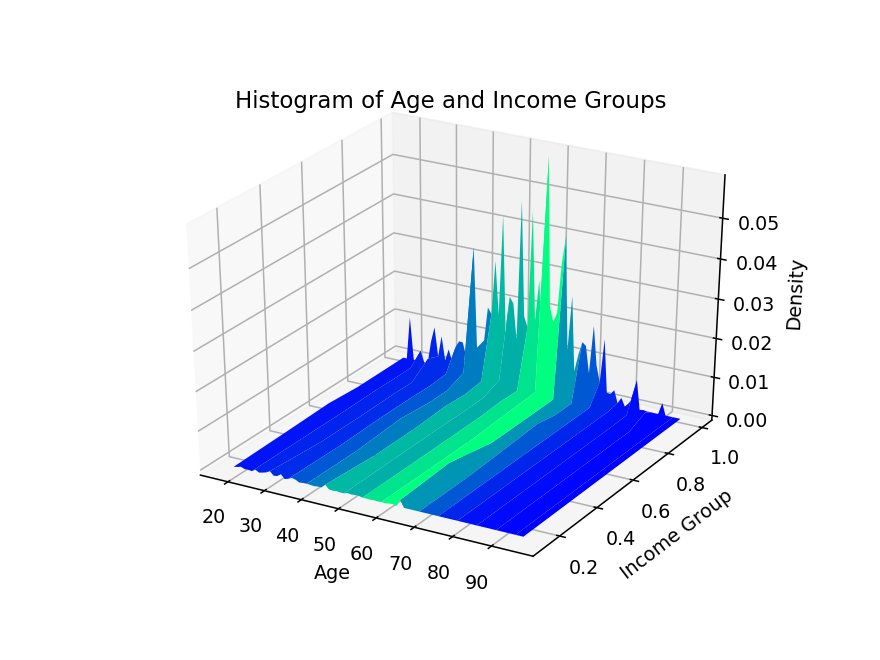

Text(0.5,0,'Density')

In [4]:
%matplotlib notebook
y_mat, x_mat = np.meshgrid(abils_midpt, ages_vec)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_mat, y_mat, bq_data, rstride=5, cmap=cm.winter)
plt.title("Histogram of Age and Income Groups")
plt.xlabel("Age")
plt.ylabel("Income Group")
ax.set_zlabel("Density")

**Problem 1B:**

In [5]:
prop_mat_inc = np.sum(bq_data, axis=0)
prop_mat_age = np.sum(bq_data, axis=1)
lrg_samp = 70000
age_probs = np.random.multinomial(lrg_samp, prop_mat_age)
income_probs = np.random.multinomial(lrg_samp, prop_mat_inc)
age_freq = np.array([])
inc_freq = np.array([])

# creating a distribution of age values
for age, num_s in zip(ages_vec, age_probs):
    vec_age_s = np.ones(num_s)
    vec_age_s *= age
    age_freq = np.append(age_freq, vec_age_s)

# creating a distribution of ability type values
for abil, num_j in zip(abils_midpt, income_probs):
    vec_abil_j = np.ones(num_j)
    vec_abil_j *= abil
    inc_freq = np.append(inc_freq, vec_abil_j)
    
# cross validation of bandwidths
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv= KFold(10))
grid.fit(bq_data[:, ])

data = np.vstack((age_freq, inc_freq))
density = gaussian_kde(data, bw_method=grid.best_params_["bandwidth"])

coords = np.vstack([item.ravel() for item in [x_mat, y_mat]])
BQkde = density(coords).reshape(x_mat.shape)
BQkde_scaled = BQkde / np.sum(BQkde)

<IPython.core.display.Javascript object>


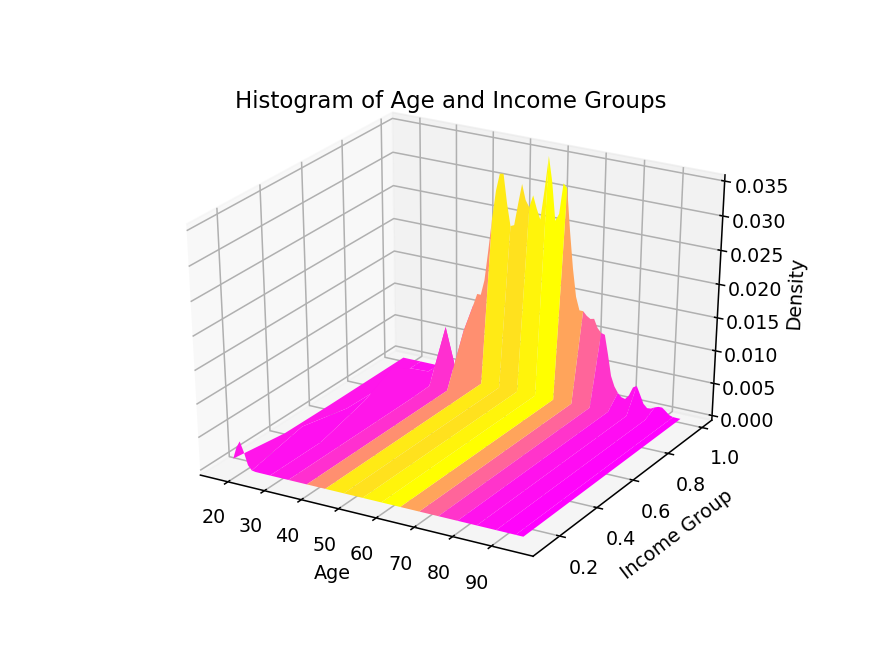

Text(0.5,0,'Density')

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x_mat, y_mat, BQkde_scaled, rstride=5, cmap = cm.spring)
plt.title("Histogram of Age and Income Groups")
plt.xlabel("Age")
plt.ylabel("Income Group")
ax.set_zlabel("Density")

In [7]:
grid.best_params_["bandwidth"]

0.1

A gaussian density kernel estimator was used, and $\lambda$ was estimated using a 10-fold K-Folds cross validation method. ($\lambda$ = 0.1)

In [8]:
BQkde_scaled[61, 5]

1.6800884602531694e-07

The estimated density is 1.513780761136397e-07.

**Problem 2A:**

In [9]:
biden_df = pd.read_csv("biden.csv")

In [10]:
biden_df.head()

,biden,female,age,educ,dem,rep
0,90.0,0,19.0,12.0,1.0,0.0
1,70.0,1,51.0,14.0,1.0,0.0
2,60.0,0,27.0,14.0,0.0,0.0
3,50.0,1,43.0,14.0,1.0,0.0
4,60.0,1,38.0,14.0,0.0,1.0


In [11]:
biden_df["educ"].value_counts()

12.0    725
14.0    328
16.0    289
13.0    244
17.0    243
11.0    128
15.0    104
10.0     85
9.0      58
8.0      42
6.0      26
7.0      12
5.0      10
3.0       7
4.0       5
1.0       3
0.0       2
2.0       1
Name: educ, dtype: int64

In [12]:
biden_df["age"].max()

93.0

In [13]:
biden_df["const"] = 1

In [14]:
biden_df["age_educ"] = biden_df["age"]*biden_df["educ"]

In [15]:
X = ["const", "age", "educ", "age_educ"]

In [16]:
reg = sm.OLS(biden_df["biden"], biden_df[X], missing='drop', hasconst=True)

In [17]:
reg_results = reg.fit()

In [18]:
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biden   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     10.13
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           1.29e-06
Time:                        18:02:32   Log-Likelihood:                -8333.3
No. Observations:                1826   AIC:                         1.667e+04
Df Residuals:                    1822   BIC:                         1.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5491      9.491      3.956      0.000      18.935      56.163
age            0.6674      0.169      3.950      0.000       0.336       0.999
educ           1.7123      0.709      2.414      0.016       0.321       3.103
age_educ      -0.0477      0.013     -3.728      0.000      -0.073      -0.023
==============================================================================
Omnibus:                       64.792   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.979
Skew:                          -0.480   Prob(JB):                     3.86e-16
Kurtosis:                       3.105   Cond. No.                     1.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary table, we can observe that age's marginal effect on $Y$ is 0.667 − 0.0477$X_2$. As education increases, the positive effect of age on feelings towards Biden decreases. We can also observe that all the variables are significant at the 0.01 level, even though this model only specifies age and education, which may in turn omit other moderator variables such as gender, or create multicollinearity problems (age and education). Let's estimate the significance of this marginal effect:

In [21]:
vcv = reg_results.cov_params()

In [35]:
point_estimate_age = reg_results.params[2]+ reg_results.params[3]

In [40]:
t_statistic_age = point_estimate_age / reg_results.HC0_se[1]
t_statistic_age

10.665705985337654

The estimated pointwise t-statistic indicates a high statistical significance of < 0.005 (df > 1000) for the marginal effect of age by education

<IPython.core.display.Javascript object>


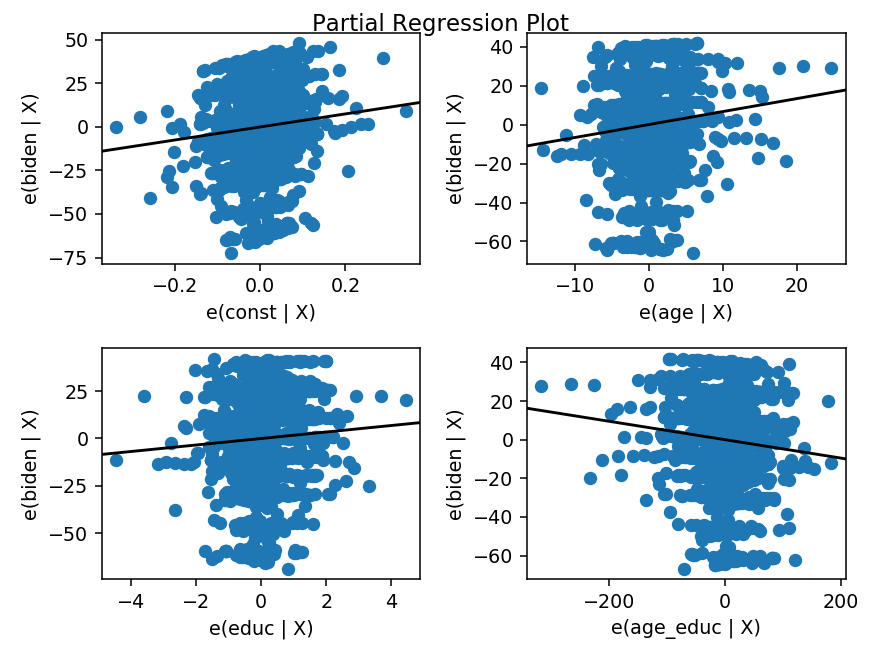

In [20]:
fig = plt.figure()
fig = sm.graphics.plot_partregress_grid(reg_results,fig=fig)

We observe from the partial regression plots that the relative slopes represent the marginal effects of each variable conditional on the others.

**Problem 2B:**

The marginal effect of education on feelings towards Biden is characterised by 1.71−0.048$X_1$. We can also observe this effect in the plot of the partial regression of the interaction term on $Y$. Let's estimate the significance of this marginal effect:

In [50]:
point_estimate_educ = reg_results.params[1] + reg_results.params[3]

In [51]:
t_statistic_educ = point_estimate_educ / reg_results.HC0_se[2]
t_statistic_educ

0.9451330562351643

The estimated pointwise t-statistic indicates that the marginal effect of education is not statistically significant (df > 1000).